# Librerias usadas en el proyecto

In [170]:
import os
from dotenv import load_dotenv

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [171]:
load_dotenv()

True

# Conexion a la api de spotify

In [172]:
client_id = os.getenv('SPOTIPY_CLIENT_ID')
client_secret = os.getenv('SPOTIPY_CLIENT_SECRET')

client_credential_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credential_manager)

# Funciones que extraeran los datos de la banda y/o el artista

# EncontrarID

esta función se encarga de buscar y encontrar el id del artista y/o banda que se solicite

# obtenerData

esta función se encarga de buscar y encontrar la data del artista y/o banda que se solicite, aquí pedimos datos como lo son:

    ° nombre del album
    ° tipo del album clasificado por "álbum" y "solista"
    ° año en que salio el album
    ° nombre de las canciones
    ° nombre del artista y/o banda
    ° duración de la cancion
    ° popularidad de la cancion

todo esto se agrega a la variable "canciones_data" y se crea el DataFrame con los datos obtenidos y se le pone nombre a las columnas

In [173]:
def encontrarID(artista):
    resultados = sp.search(q=artista, limit=1, type='artist')
    return resultados['artists']['items'][0]['id']

def obtenerData(artista_id): # 'album', 'single', 'appears_on', 'compilation'
    canciones_data = [] # Crear una lista vacía para almacenar los datos de las canciones
    
    albumes = sp.artist_albums(artista_id, album_type='album') # Obtener los álbumes del artista
    singles = sp.artist_albums(artista_id, album_type='single') # Obtener los singles del artista
    
    for album in albumes['items'] + singles['items']: # Obtener las canciones para cada álbum
        album_nombre = album['name']
        album_tipo = {'album':'Álbum', 'single':'Single'}[album['album_type']]
        album_año = album['release_date'].split('-')[0]  # Obtener el año de lanzamiento
        
        tracks = sp.album_tracks(album['id'])

        for track in tracks['items']: # Para cada canción, obtener los detalles y añadirlos a la lista de canciones
            cancion_nombre = track['name']
            cancion_artistas = ', '.join([t['name'] for t in track['artists']])
            cancion_duracion = '{:02d}:{:02d}'.format(*divmod(track['duration_ms'] // 1000, 60))
            cancion_popularidad = sp.track(track['id'])['popularity'] # Obtener la popularidad de la canción
            
            # Añadir los detalles de cadaa canción a la lista de canciones
            canciones_data.append([album_nombre, album_tipo, album_año, cancion_nombre, cancion_artistas, cancion_duracion, cancion_popularidad])
            
    return pd.DataFrame(canciones_data, columns=['Álbum', 'Tipo', 'Año', 'Canción', 'Artistas', 'Duración', 'Popularidad'])

# Obtencion de los datos de la banda deseada

In [174]:
id_OD = encontrarID('One Direction')
print('ID de artista de One Direction:', id_OD)

df_OD = obtenerData(id_OD)
df_OD['Etapa'] = 'One Direction'
df_OD

ID de artista de One Direction: 4AK6F7OLvEQ5QYCBNiQWHq


,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Etapa
0,Made In The A.M. (Deluxe Edition),Álbum,2015,Hey Angel,One Direction,04:00,57,One Direction
1,Made In The A.M. (Deluxe Edition),Álbum,2015,Drag Me Down,One Direction,03:12,80,One Direction
2,Made In The A.M. (Deluxe Edition),Álbum,2015,Perfect,One Direction,03:50,79,One Direction
3,Made In The A.M. (Deluxe Edition),Álbum,2015,Infinity,One Direction,04:09,62,One Direction
4,Made In The A.M. (Deluxe Edition),Álbum,2015,End of the Day,One Direction,03:14,59,One Direction
...,...,...,...,...,...,...,...,...
123,Acoustic - EP,Single,2010,One Thing - Acoustic,One Direction,03:02,50,One Direction
124,Acoustic - EP,Single,2010,Steal My Girl - Acoustic Version,One Direction,03:47,44,One Direction
125,Acoustic - EP,Single,2010,Steal My Girl - Live Acoustic Session,One Direction,03:46,35,One Direction
126,Acoustic - EP,Single,2010,Night Changes - Live Acoustic Session,One Direction,03:41,49,One Direction


# Obtencion de los datos de la artista deseado

In [175]:
id_LT = encontrarID('Louis Tomlinson')
print('ID de artista Louis Tomlinson:', id_LT)

df_LT = obtenerData(id_LT)
df_LT['Etapa'] = 'Solista'
df_LT

ID de artista Louis Tomlinson: 57WHJIHrjOE3iAxpihhMnp


,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Etapa
0,LIVE,Álbum,2024,"The Greatest - Live From London, 17 November 2023",Louis Tomlinson,03:48,47,Solista
1,LIVE,Álbum,2024,"Face The Music - Live From Nashville, 18 July ...",Louis Tomlinson,02:50,45,Solista
2,LIVE,Álbum,2024,"Bigger Than Me - Live From Vancouver, 26 June ...",Louis Tomlinson,03:45,44,Solista
3,LIVE,Álbum,2024,"Holding On To Heartache - Live From Barcelona,...",Louis Tomlinson,04:04,46,Solista
4,LIVE,Álbum,2024,"We Made It - Live From Manila, 16 July 2022",Louis Tomlinson,03:29,44,Solista
...,...,...,...,...,...,...,...,...
98,Just Hold On (Remixes),Single,2017,Just Hold On - Attom Remix,"Steve Aoki, Louis Tomlinson, Attom",04:03,21,Solista
99,Just Hold On (Remixes),Single,2017,Just Hold On - Two Friends Remix,"Steve Aoki, Louis Tomlinson, Two Friends",03:50,23,Solista
100,Just Hold On (Remixes),Single,2017,Just Hold On - Shaan Remix,"Steve Aoki, Louis Tomlinson, Shaan",02:40,18,Solista
101,Just Hold On (Remixes),Single,2017,Just Hold On - TJH87 Remix,"Steve Aoki, Louis Tomlinson, TJH87",04:56,19,Solista


# Concatenacion de los DataFrames

se concatenan los DataFrames obtenidos anteriormente por medio de las funciones con la función de pandas "concat()"

In [176]:
df_concat = pd.concat([df_OD, df_LT], ignore_index=True)
df_concat

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Etapa
0,Made In The A.M. (Deluxe Edition),Álbum,2015,Hey Angel,One Direction,04:00,57,One Direction
1,Made In The A.M. (Deluxe Edition),Álbum,2015,Drag Me Down,One Direction,03:12,80,One Direction
2,Made In The A.M. (Deluxe Edition),Álbum,2015,Perfect,One Direction,03:50,79,One Direction
3,Made In The A.M. (Deluxe Edition),Álbum,2015,Infinity,One Direction,04:09,62,One Direction
4,Made In The A.M. (Deluxe Edition),Álbum,2015,End of the Day,One Direction,03:14,59,One Direction
...,...,...,...,...,...,...,...,...
226,Just Hold On (Remixes),Single,2017,Just Hold On - Attom Remix,"Steve Aoki, Louis Tomlinson, Attom",04:03,21,Solista
227,Just Hold On (Remixes),Single,2017,Just Hold On - Two Friends Remix,"Steve Aoki, Louis Tomlinson, Two Friends",03:50,23,Solista
228,Just Hold On (Remixes),Single,2017,Just Hold On - Shaan Remix,"Steve Aoki, Louis Tomlinson, Shaan",02:40,18,Solista
229,Just Hold On (Remixes),Single,2017,Just Hold On - TJH87 Remix,"Steve Aoki, Louis Tomlinson, TJH87",04:56,19,Solista


# Creación de la de nuevas columnas

este código transforma la duración de cada canción de un formato inicial a segundos enteros

In [177]:
df_concat["Duración_formato"] = "00:" + df_concat["Duración"]
df_concat["Duración_timedelta"] = pd.to_timedelta(df_concat["Duración_formato"])
df_concat["Duración_segundos"] = df_concat["Duración_timedelta"].dt.total_seconds()
df_concat["Duración_segundos"] = df_concat["Duración_segundos"].astype(int)

df_concat

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Etapa,Duración_formato,Duración_timedelta,Duración_segundos
0,Made In The A.M. (Deluxe Edition),Álbum,2015,Hey Angel,One Direction,04:00,57,One Direction,00:04:00,0 days 00:04:00,240
1,Made In The A.M. (Deluxe Edition),Álbum,2015,Drag Me Down,One Direction,03:12,80,One Direction,00:03:12,0 days 00:03:12,192
2,Made In The A.M. (Deluxe Edition),Álbum,2015,Perfect,One Direction,03:50,79,One Direction,00:03:50,0 days 00:03:50,230
3,Made In The A.M. (Deluxe Edition),Álbum,2015,Infinity,One Direction,04:09,62,One Direction,00:04:09,0 days 00:04:09,249
4,Made In The A.M. (Deluxe Edition),Álbum,2015,End of the Day,One Direction,03:14,59,One Direction,00:03:14,0 days 00:03:14,194
...,...,...,...,...,...,...,...,...,...,...,...
226,Just Hold On (Remixes),Single,2017,Just Hold On - Attom Remix,"Steve Aoki, Louis Tomlinson, Attom",04:03,21,Solista,00:04:03,0 days 00:04:03,243
227,Just Hold On (Remixes),Single,2017,Just Hold On - Two Friends Remix,"Steve Aoki, Louis Tomlinson, Two Friends",03:50,23,Solista,00:03:50,0 days 00:03:50,230
228,Just Hold On (Remixes),Single,2017,Just Hold On - Shaan Remix,"Steve Aoki, Louis Tomlinson, Shaan",02:40,18,Solista,00:02:40,0 days 00:02:40,160
229,Just Hold On (Remixes),Single,2017,Just Hold On - TJH87 Remix,"Steve Aoki, Louis Tomlinson, TJH87",04:56,19,Solista,00:04:56,0 days 00:04:56,296


# Eliminación de columnas

se elimina las columnas "Duración_formato" y "Duración_timedelta" ya que no se consideran relevantes para el analisis de la data, se deja solo la columna "Duración_segundos"

In [178]:
df_concat.drop(columns=["Duración_formato", "Duración_timedelta"], inplace=True)
df_concat

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad,Etapa,Duración_segundos
0,Made In The A.M. (Deluxe Edition),Álbum,2015,Hey Angel,One Direction,04:00,57,One Direction,240
1,Made In The A.M. (Deluxe Edition),Álbum,2015,Drag Me Down,One Direction,03:12,80,One Direction,192
2,Made In The A.M. (Deluxe Edition),Álbum,2015,Perfect,One Direction,03:50,79,One Direction,230
3,Made In The A.M. (Deluxe Edition),Álbum,2015,Infinity,One Direction,04:09,62,One Direction,249
4,Made In The A.M. (Deluxe Edition),Álbum,2015,End of the Day,One Direction,03:14,59,One Direction,194
...,...,...,...,...,...,...,...,...,...
226,Just Hold On (Remixes),Single,2017,Just Hold On - Attom Remix,"Steve Aoki, Louis Tomlinson, Attom",04:03,21,Solista,243
227,Just Hold On (Remixes),Single,2017,Just Hold On - Two Friends Remix,"Steve Aoki, Louis Tomlinson, Two Friends",03:50,23,Solista,230
228,Just Hold On (Remixes),Single,2017,Just Hold On - Shaan Remix,"Steve Aoki, Louis Tomlinson, Shaan",02:40,18,Solista,160
229,Just Hold On (Remixes),Single,2017,Just Hold On - TJH87 Remix,"Steve Aoki, Louis Tomlinson, TJH87",04:56,19,Solista,296


# Ordenando las columnas de forma alfabetica

se ordenan las columnan en orden alfabetico para una mejor comprensión del DataFrame (esto solo es un proceso que yo mismo considere necesario, no es obligatorio hacerlo si no quieres)

In [179]:
df_ordenado = sorted(df_concat)
print(df_ordenado) 
df_concat = df_concat[df_ordenado]
df_concat

['Artistas', 'Año', 'Canción', 'Duración', 'Duración_segundos', 'Etapa', 'Popularidad', 'Tipo', 'Álbum']


,Artistas,Año,Canción,Duración,Duración_segundos,Etapa,Popularidad,Tipo,Álbum
0,One Direction,2015,Hey Angel,04:00,240,One Direction,57,Álbum,Made In The A.M. (Deluxe Edition)
1,One Direction,2015,Drag Me Down,03:12,192,One Direction,80,Álbum,Made In The A.M. (Deluxe Edition)
2,One Direction,2015,Perfect,03:50,230,One Direction,79,Álbum,Made In The A.M. (Deluxe Edition)
3,One Direction,2015,Infinity,04:09,249,One Direction,62,Álbum,Made In The A.M. (Deluxe Edition)
4,One Direction,2015,End of the Day,03:14,194,One Direction,59,Álbum,Made In The A.M. (Deluxe Edition)
...,...,...,...,...,...,...,...,...,...
226,"Steve Aoki, Louis Tomlinson, Attom",2017,Just Hold On - Attom Remix,04:03,243,Solista,21,Single,Just Hold On (Remixes)
227,"Steve Aoki, Louis Tomlinson, Two Friends",2017,Just Hold On - Two Friends Remix,03:50,230,Solista,23,Single,Just Hold On (Remixes)
228,"Steve Aoki, Louis Tomlinson, Shaan",2017,Just Hold On - Shaan Remix,02:40,160,Solista,18,Single,Just Hold On (Remixes)
229,"Steve Aoki, Louis Tomlinson, TJH87",2017,Just Hold On - TJH87 Remix,04:56,296,Solista,19,Single,Just Hold On (Remixes)


In [180]:
df_concat["Año"] = pd.to_datetime(df_concat["Año"], format='%Y')
df_concat['Año'] = df_concat['Año'].dt.year
df_concat

,Artistas,Año,Canción,Duración,Duración_segundos,Etapa,Popularidad,Tipo,Álbum
0,One Direction,2015,Hey Angel,04:00,240,One Direction,57,Álbum,Made In The A.M. (Deluxe Edition)
1,One Direction,2015,Drag Me Down,03:12,192,One Direction,80,Álbum,Made In The A.M. (Deluxe Edition)
2,One Direction,2015,Perfect,03:50,230,One Direction,79,Álbum,Made In The A.M. (Deluxe Edition)
3,One Direction,2015,Infinity,04:09,249,One Direction,62,Álbum,Made In The A.M. (Deluxe Edition)
4,One Direction,2015,End of the Day,03:14,194,One Direction,59,Álbum,Made In The A.M. (Deluxe Edition)
...,...,...,...,...,...,...,...,...,...
226,"Steve Aoki, Louis Tomlinson, Attom",2017,Just Hold On - Attom Remix,04:03,243,Solista,21,Single,Just Hold On (Remixes)
227,"Steve Aoki, Louis Tomlinson, Two Friends",2017,Just Hold On - Two Friends Remix,03:50,230,Solista,23,Single,Just Hold On (Remixes)
228,"Steve Aoki, Louis Tomlinson, Shaan",2017,Just Hold On - Shaan Remix,02:40,160,Solista,18,Single,Just Hold On (Remixes)
229,"Steve Aoki, Louis Tomlinson, TJH87",2017,Just Hold On - TJH87 Remix,04:56,296,Solista,19,Single,Just Hold On (Remixes)


In [181]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Artistas           231 non-null    object
 1   Año                231 non-null    int32 
 2   Canción            231 non-null    object
 3   Duración           231 non-null    object
 4   Duración_segundos  231 non-null    int32 
 5   Etapa              231 non-null    object
 6   Popularidad        231 non-null    int64 
 7   Tipo               231 non-null    object
 8   Álbum              231 non-null    object
dtypes: int32(2), int64(1), object(6)
memory usage: 14.6+ KB


In [182]:
df_concat.describe()

,Año,Duración_segundos,Popularidad
count,231.000000,231.000000,231.000000
mean,2016.311688,201.450216,45.722944
std,4.704096,53.406203,17.051873
min,2010.000000,4.000000,0.000000
25%,2012.000000,181.000000,33.500000
50%,2015.000000,202.000000,50.000000
75%,2020.000000,226.000000,57.000000
max,2024.000000,509.000000,87.000000


# Top de canciones más populares en su etapa como integrante de "One Direction" y como "Solista"

- Gráficos de Barras: Comparar la popularidad y la duración de las canciones entre las etapas "One Direction" y "Solista".
- Histogramas: Visualizar la distribución de la popularidad y la duración de las canciones.
- Diagramas de Caja: Comparar la variabilidad de la popularidad y la duración entre las etapas.

In [183]:
canciones_LT = df_concat[df_concat["Etapa"] == "Solista"]
canciones_OD = df_concat[df_concat["Etapa"] == "One Direction"]

top_10_canciones_OD = canciones_OD.sort_values("Popularidad", ascending=False).head(10)
top_10_canciones_LT = canciones_LT.sort_values("Popularidad", ascending=False).head(10)
top_canciones = pd.concat([top_10_canciones_OD, top_10_canciones_LT], ignore_index=True)
top_canciones.head()


,Artistas,Año,Canción,Duración,Duración_segundos,Etapa,Popularidad,Tipo,Álbum
0,One Direction,2014,Night Changes,03:46,226,One Direction,87,Álbum,FOUR (Deluxe)
1,One Direction,2012,What Makes You Beautiful,03:19,199,One Direction,84,Álbum,Up All Night
2,One Direction,2013,Story of My Life,04:05,245,One Direction,83,Álbum,Midnight Memories (Deluxe)
3,One Direction,2015,Drag Me Down,03:12,192,One Direction,80,Álbum,Made In The A.M. (Deluxe Edition)
4,One Direction,2015,Perfect,03:50,230,One Direction,79,Álbum,Made In The A.M. (Deluxe Edition)


In [184]:
color = {"Solista" : "red", "One Direction" : "blue"}

fig = px.bar(top_canciones, x="Canción", y="Popularidad", text="Popularidad", color="Etapa", color_discrete_map=color, hover_data={'Álbum':True, 'Año':True, 'Tipo':True, 'Álbum' : True},title='Canciones más populares: One Direction vs Solista',
             template='plotly_dark')

fig.update_layout(title = {'text' : 'Canciones más populares: One Direction vs Solista','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12))


fig.show()

In [185]:
duracion = df_concat.sort_values("Duración",ascending=False).head(10)
duracion.head()

,Artistas,Año,Canción,Duración,Duración_segundos,Etapa,Popularidad,Tipo,Álbum
136,Louis Tomlinson,2024,All This Time / She Is Beauty We Are World Cla...,08:29,509,Solista,46,Álbum,LIVE
100,"One Direction, Steve Smart, WestFunk",2010,Gotta Be You - Steve Smart & Westfunk Remix,06:17,377,One Direction,22,Single,Remixes - EP
140,Louis Tomlinson,2024,"Saturdays - Live From Paris, 14 October 2023",05:56,356,Solista,43,Álbum,LIVE
102,"One Direction, Dave Audé",2010,Live While We're Young - Dave Aude Remix,05:40,340,One Direction,24,Single,Remixes - EP
134,Louis Tomlinson,2024,"Fearless - Live From Rio, 27 May 2022",05:37,337,Solista,44,Álbum,LIVE


In [186]:
color = {"Solista" : "red", "One Direction" : "blue"}
fig = px.bar(duracion, x="Canción", y="Duración_segundos", text="Duración",color="Etapa", color_discrete_map=color, hover_data={'Álbum':True, 'Año':True, 'Tipo':True, 'Álbum' : True},title='Canciones con más diración: One Direction vs Solista',
             template='plotly_dark')


fig.update_layout(title = {'text' : 'Canciones con más Duración: One Direction vs Solista','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12))


fig

In [187]:
color = {"Solista" : "red", "One Direction" : "blue"}
popularidad_duracion_canciones = px.histogram(df_concat, x='Popularidad', nbins=25,
                               title='Distribución de la Popularidad de las Canciones',
                               labels={'Popularidad': 'Popularidad Promedio'}, color="Etapa" ,color_discrete_map=color, template="plotly_dark")
popularidad_duracion_canciones.update_layout(barmode="group",bargap=0.2, bargroupgap=0.05, title = {'text' : 'Distribución de la Popularidad de las Canciones','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12))
# popularidad_duracion_canciones.update_traces(opacity=0.7)
popularidad_duracion_canciones

In [188]:
canciones_LT = df_concat[df_concat["Etapa"] == "Solista"]

popularidad_duracion_canciones_lt = canciones_LT.groupby("Canción").agg({
    'Popularidad': 'mean',
    'Duración_segundos': 'mean'
}).reset_index()

popularidad_duracion_canciones_lt

,Canción,Popularidad,Duración_segundos
0,All This Time,45.0,175.0
1,All This Time / She Is Beauty We Are World Cla...,46.0,509.0
2,Always You,57.0,187.0
3,Always You - Track By Track,15.0,81.0
4,Angels Fly,44.5,217.0
...,...,...,...
71,We Made It,43.0,201.0
72,"We Made It - Live From Manila, 16 July 2022",44.0,209.0
73,We Made It - Track By Track,15.0,53.0
74,Written All Over Your Face,47.5,160.0


In [189]:
fig_popularidad = px.histogram(popularidad_duracion_canciones_lt, x='Popularidad', nbins=10,
                               title='Distribución de la Popularidad de las Canciones como Solista',
                               labels={'Popularidad': 'Popularidad Promedio'}, color_discrete_sequence=['red'], template="plotly_dark")
fig_popularidad.update_layout(title = {'text' : 'Distribución de la Popularidad de las Canciones como Solista','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12))


fig_popularidad.show()

In [190]:
canciones_OD = df_concat[df_concat["Etapa"] == "One Direction"]
popularidad_duracion_canciones_od = canciones_OD.groupby("Canción").agg({
    'Popularidad': 'mean',
    'Duración_segundos': 'mean'
}).reset_index()
popularidad_duracion_canciones_od.head()

,Canción,Popularidad,Duración_segundos
0,18,76.0,248.0
1,A.M.,60.0,209.0
2,Act My Age,56.0,198.0
3,Alive,53.0,161.0
4,Another World,50.0,203.0


In [191]:
fig_popularidad_od = px.histogram(popularidad_duracion_canciones_od, x='Popularidad', nbins=15,
                               title='Distribución de la Popularidad de las Canciones como One Direction',
                               labels={'Popularidad': 'Popularidad Promedio'}, color_discrete_sequence=['blue'], template="plotly_dark")
fig_popularidad_od.update_layout(title = {'text' : 'Distribución de la Popularidad de las Canciones como One Direction','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12))

fig_popularidad_od

# Analisis de tendencia

- Tendencias Temporales: Analizar las tendencias temporales en la popularidad y la duración de las canciones a lo largo del tiempo.

- Evolución por Álbum: Examinar cómo ha evolucionado la popularidad de las canciones en cada álbum.

In [192]:
tendencias_time = df_concat.groupby("Año").agg({
    'Popularidad': 'mean',
    'Duración_segundos': 'mean'
}).reset_index()

tendencias_time.head()

,Año,Popularidad,Duración_segundos
0,2010,32.000000,233.750000
1,2012,58.789474,201.657895
2,2013,54.320000,196.240000
3,2014,58.200000,216.150000
4,2015,62.470588,206.235294


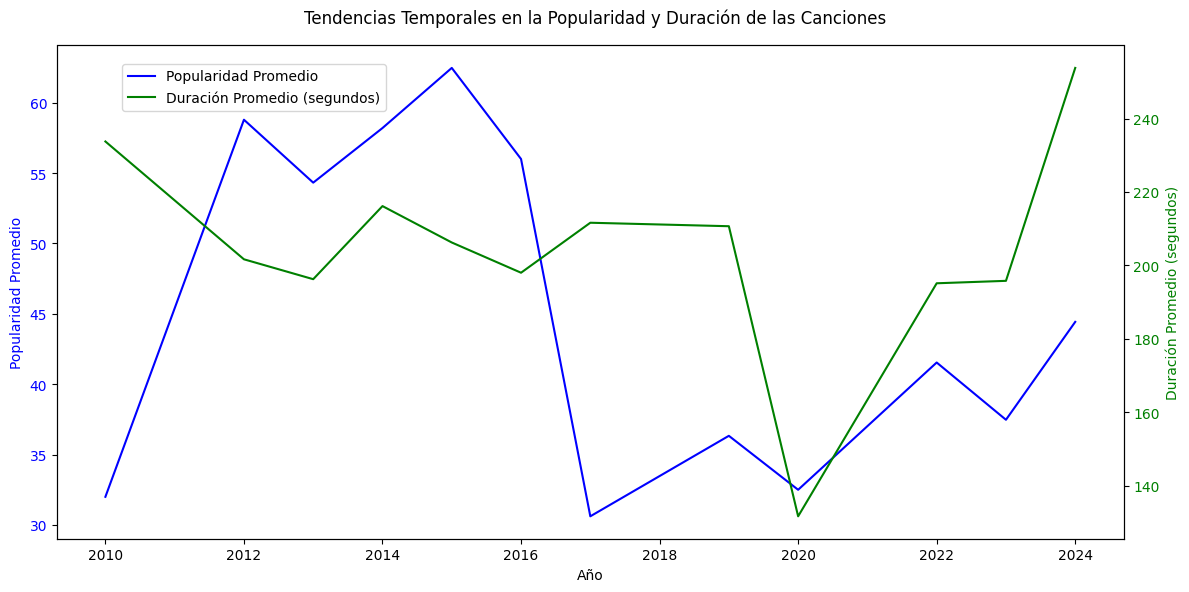

In [193]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de línea para la popularidad
ax1.set_xlabel('Año')
ax1.set_ylabel('Popularidad Promedio', color='blue')
ax1.plot(tendencias_time['Año'], tendencias_time['Popularidad'], color='blue', label='Popularidad Promedio')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la duración
ax2 = ax1.twinx()
ax2.set_ylabel('Duración Promedio (segundos)', color='green')
ax2.plot(tendencias_time['Año'], tendencias_time['Duración_segundos'], color='green', label='Duración Promedio (segundos)')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir títulos y leyendas
fig.suptitle('Tendencias Temporales en la Popularidad y Duración de las Canciones')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

In [194]:
canciones_LT = df_concat[df_concat["Etapa"] == "Solista"]
tendencias_lt = canciones_LT.groupby("Año").agg({
    'Popularidad': 'mean',
    'Duración_segundos': 'mean'
}).reset_index()

tendencias_lt

,Año,Popularidad,Duración_segundos
0,2016,56.000000,198.000000
1,2017,30.615385,211.615385
2,2019,36.333333,210.666667
3,2020,32.500000,131.653846
4,2022,41.541667,195.125000
5,2023,37.473684,195.789474
6,2024,44.428571,253.785714


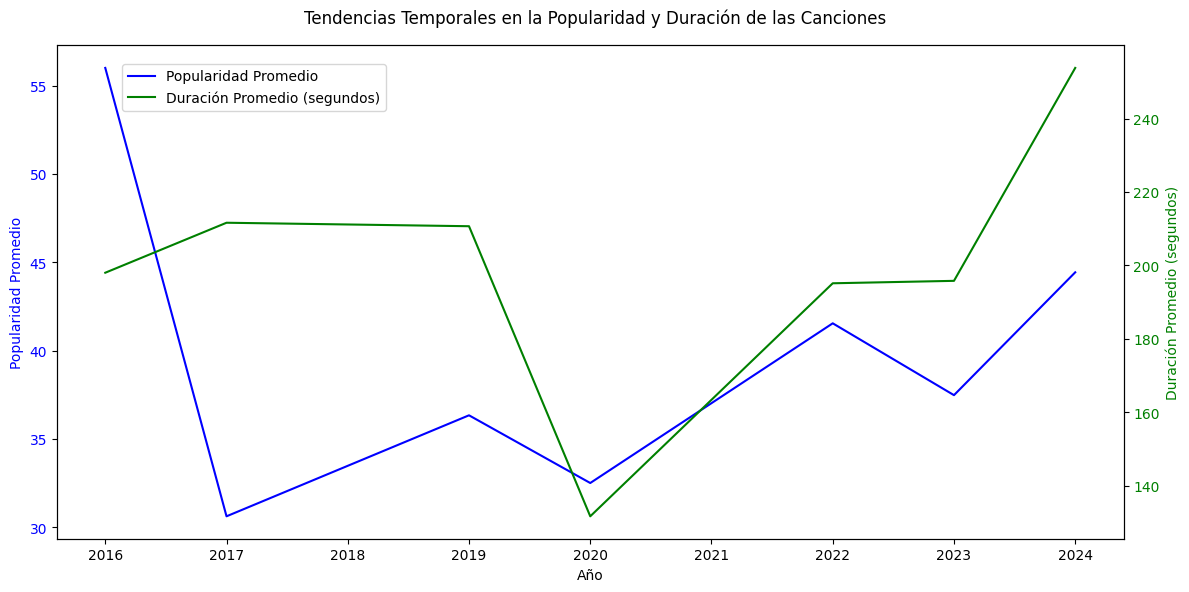

In [195]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de línea para la popularidad
ax1.set_xlabel('Año')
ax1.set_ylabel('Popularidad Promedio', color='blue')
ax1.plot(tendencias_lt['Año'], tendencias_lt['Popularidad'], color='blue', label='Popularidad Promedio')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la duración
ax2 = ax1.twinx()
ax2.set_ylabel('Duración Promedio (segundos)', color='green')
ax2.plot(tendencias_lt['Año'], tendencias_lt['Duración_segundos'], color='green', label='Duración Promedio (segundos)')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir títulos y leyendas
fig.suptitle('Tendencias Temporales en la Popularidad y Duración de las Canciones')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

In [196]:
canciones_OD = df_concat[df_concat["Etapa"] == "One Direction"]
tendencias_OD = canciones_OD.groupby("Año").agg({
    'Popularidad': 'mean',
    'Duración_segundos': 'mean'
}).reset_index()

tendencias_OD

,Año,Popularidad,Duración_segundos
0,2010,32.000000,233.750000
1,2012,58.789474,201.657895
2,2013,54.320000,196.240000
3,2014,58.200000,216.150000
4,2015,62.470588,206.235294


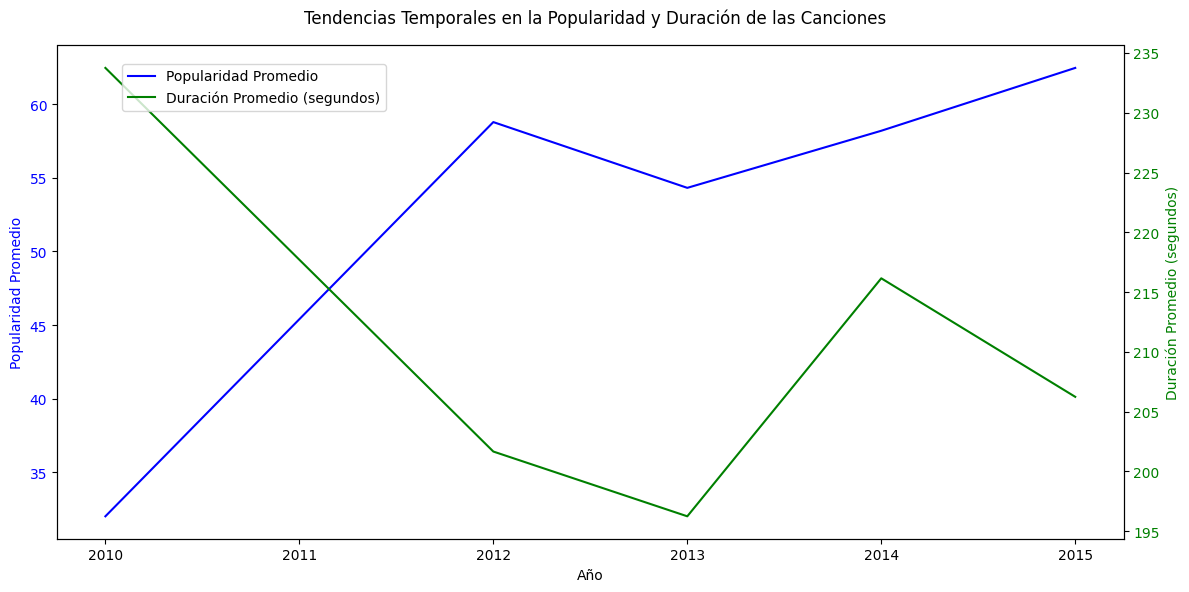

In [197]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de línea para la popularidad
ax1.set_xlabel('Año')
ax1.set_ylabel('Popularidad Promedio', color='blue')
ax1.plot(tendencias_OD['Año'], tendencias_OD['Popularidad'], color='blue', label='Popularidad Promedio')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la duración
ax2 = ax1.twinx()
ax2.set_ylabel('Duración Promedio (segundos)', color='green')
ax2.plot(tendencias_OD['Año'], tendencias_OD['Duración_segundos'], color='green', label='Duración Promedio (segundos)')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir títulos y leyendas
fig.suptitle('Tendencias Temporales en la Popularidad y Duración de las Canciones')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

In [198]:
popularidad_album = df_concat.groupby("Álbum").agg({
    "Popularidad" : "mean",
    "Año" : "first",
    "Etapa" : "first"
}).reset_index()
popularidad_album.head()

,Álbum,Popularidad,Año,Etapa
0,Acoustic - EP,44.0,2010,One Direction
1,Back to You (feat. Bebe Rexha & Digital Farm A...,47.5,2017,Solista
2,Best Song Ever (From THIS IS US),30.5,2013,One Direction
3,Bigger Than Me,21.0,2022,Solista
4,Bigger Than Me (Live from Milan),20.0,2022,Solista


In [199]:
color = {"Solista" : "red", "One Direction" : "blue"}


fig = px.line(popularidad_album, 
              x='Álbum', 
              y='Popularidad', 
              title='Evolución de la Popularidad por Álbum',
              labels={'Popularidad': 'Popularidad Promedio'},
              markers=True,  # Añadir puntos para cada álbum
              hover_data={"Etapa":True},
              template='plotly_dark'
)

fig.update_traces(marker=dict(size=10))

# Ajustar el layout para mejor visualización
fig.update_layout(
    xaxis_title='Álbum',
    yaxis_title='Popularidad Promedio',  
    hovermode='x unified',  # Mostrar información detallada al pasar el mouse
    title = {'text' : 'Evolución de la Popularidad por Álbum','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12)
)

fig

In [200]:
canciones_LT = df_concat[df_concat["Etapa"] == "Solista"]
popularidad_album_lt = canciones_LT.groupby("Álbum").agg({
    "Popularidad" : "mean",
    "Año" : "first"
}).reset_index()
popularidad_album_lt.head()


,Álbum,Popularidad,Año
0,Back to You (feat. Bebe Rexha & Digital Farm A...,47.500000,2017
1,Bigger Than Me,21.000000,2022
2,Bigger Than Me (Live from Milan),20.000000,2022
3,Don't Let It Break Your Heart,32.000000,2019
4,Faith In The Future (Bonus Edition),37.473684,2023


In [201]:
fig = px.line(popularidad_album_lt, 
              x='Álbum', 
              y='Popularidad', 
              title='Evolución de la Popularidad por Álbum como Solista',
              labels={'Popularidad': 'Popularidad Promedio'},
              markers=True,  # Añadir puntos para cada álbum
              template='plotly_dark')

fig.update_traces(line=dict(color='red'),marker=dict(size=10))

# Ajustar el layout para mejor visualización
fig.update_layout(
    xaxis_title='Álbum',
    yaxis_title='Popularidad Promedio',  
    hovermode='x unified',  # Mostrar información detallada al pasar el mouse
    title = {'text' : 'Evolución de la Popularidad por Álbum como Solista','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12)
)
    

fig

In [202]:
canciones_OD = df_concat[df_concat["Etapa"] == "One Direction"]
popularidad_album_od = canciones_OD.groupby("Álbum").agg({
    "Popularidad" : "mean",
    "Año" : "first"
}).reset_index()
popularidad_album_od.head()


,Álbum,Popularidad,Año
0,Acoustic - EP,44.000000,2010
1,Best Song Ever (From THIS IS US),30.500000,2013
2,FOUR (Deluxe),63.187500,2014
3,Live - EP,29.800000,2010
4,Made In The A.M. (Deluxe Edition),62.470588,2015


In [203]:
fig = px.line(popularidad_album_od, 
              x='Álbum', 
              y='Popularidad', 
              title='Evolución de la Popularidad por Álbum como One Direction',
              labels={'Popularidad': 'Popularidad Promedio'},
              markers=True,  # Añadir puntos para cada álbum
              template='plotly_dark')

fig.update_traces(line=dict(color='blue'),marker=dict(size=10))

# Ajustar el layout para mejor visualización
fig.update_layout(
    xaxis_title='Álbum',
    yaxis_title='Popularidad Promedio',  
    hovermode='x unified',  # Mostrar información detallada al pasar el mouse
    title = {'text' : 'Evolución de la Popularidad por Álbum como One Direction','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12)
)

fig

# Analisis detallado sobre albumnes

In [205]:
df_albumnes = df_concat.groupby("Álbum").agg({"Tipo" : "first", "Canción" : "count" ,"Etapa" : "first" , "Año" : "first", "Popularidad" : "mean", "Duración_segundos" : "sum"}).reset_index()
df_albumnes["Duración"] = df_albumnes["Duración_segundos"].apply(lambda x:'{:02d}:{:02d}'.format(*divmod(int(x), 60)))
df_albumnes.head(10)

,Álbum,Tipo,Canción,Etapa,Año,Popularidad,Duración_segundos,Duración
0,Acoustic - EP,Single,5,One Direction,2010,44.000000,1088,18:08
1,Back to You (feat. Bebe Rexha & Digital Farm A...,Single,2,Solista,2017,47.500000,452,07:32
2,Best Song Ever (From THIS IS US),Single,4,One Direction,2013,30.500000,842,14:02
3,Bigger Than Me,Single,1,Solista,2022,21.000000,221,03:41
4,Bigger Than Me (Live from Milan),Single,2,Solista,2022,20.000000,444,07:24
5,Don't Let It Break Your Heart,Single,2,Solista,2019,32.000000,400,06:40
6,FOUR (Deluxe),Álbum,16,One Direction,2014,63.187500,3428,57:08
7,Faith In The Future (Bonus Edition),Álbum,19,Solista,2023,37.473684,3720,62:00
8,Faith In The Future (Deluxe),Álbum,16,Solista,2022,53.375000,3097,51:37
9,Just Hold On,Single,1,Solista,2016,56.000000,198,03:18


In [206]:
albumnes_duracion = df_albumnes.sort_values(by=["Duración_segundos"], ascending=False).reset_index().head(10)
albumnes_duracion

,index,Álbum,Tipo,Canción,Etapa,Año,Popularidad,Duración_segundos,Duración
0,25,Take Me Home (Expanded Edition),Álbum,20,One Direction,2012,59.500000,3891,64:51
1,28,Up All Night,Álbum,18,One Direction,2012,58.000000,3772,62:52
2,7,Faith In The Future (Bonus Edition),Álbum,19,Solista,2023,37.473684,3720,62:00
3,17,Midnight Memories (Deluxe),Álbum,18,One Direction,2013,62.555556,3563,59:23
4,13,LIVE,Álbum,14,Solista,2024,44.428571,3553,59:13
5,15,Made In The A.M. (Deluxe Edition),Álbum,17,One Direction,2015,62.470588,3506,58:26
6,23,Remixes - EP,Single,14,One Direction,2010,25.857143,3443,57:23
7,6,FOUR (Deluxe),Álbum,16,One Direction,2014,63.187500,3428,57:08
8,8,Faith In The Future (Deluxe),Álbum,16,Solista,2022,53.375000,3097,51:37
9,29,Walls,Álbum,13,Solista,2020,50.846154,2599,43:19


In [207]:
color = {"Solista" : "red", "One Direction" : "blue"}
fig = px.bar(albumnes_duracion, x="Álbum", y="Duración_segundos", text="Duración",color="Etapa", color_discrete_map=color, hover_data={'Duración_segundos':True, 'Duración' : True, "Tipo" : True},title='Álbumnes con más duración: One Direction vs Solista',
             template='plotly_dark')


fig.update_layout(title = {'text' : 'Álbumnes con más Duración: One Direction vs Solista','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12))

In [208]:
albumnes_canciones = df_albumnes.sort_values(by=["Canción"], ascending=False).reset_index().head(10)
albumnes_canciones

,index,Álbum,Tipo,Canción,Etapa,Año,Popularidad,Duración_segundos,Duración
0,25,Take Me Home (Expanded Edition),Álbum,20,One Direction,2012,59.500000,3891,64:51
1,7,Faith In The Future (Bonus Edition),Álbum,19,Solista,2023,37.473684,3720,62:00
2,28,Up All Night,Álbum,18,One Direction,2012,58.000000,3772,62:52
3,17,Midnight Memories (Deluxe),Álbum,18,One Direction,2013,62.555556,3563,59:23
4,15,Made In The A.M. (Deluxe Edition),Álbum,17,One Direction,2015,62.470588,3506,58:26
5,6,FOUR (Deluxe),Álbum,16,One Direction,2014,63.187500,3428,57:08
6,8,Faith In The Future (Deluxe),Álbum,16,Solista,2022,53.375000,3097,51:37
7,23,Remixes - EP,Single,14,One Direction,2010,25.857143,3443,57:23
8,13,LIVE,Álbum,14,Solista,2024,44.428571,3553,59:13
9,30,Walls: Track By Track,Álbum,13,Solista,2020,14.153846,824,13:44


In [209]:
color = {"Solista" : "red", "One Direction" : "blue"}
fig = px.bar(albumnes_canciones, x="Álbum", y="Canción", text="Canción",color="Etapa", color_discrete_map=color, hover_data={'Duración_segundos':True, 'Duración' : True, "Tipo" : True},title='Álbumnes con más canciones: One Direction vs Solista',
             template='plotly_dark')


fig.update_layout(title = {'text' : 'Álbumnes con más canciones: One Direction vs Solista','y':0.9, 'x':0.5, 'xanchor' : 'center', 'yanchor' : 'top', 'font':dict(size=25, color='white')}, height = 600, margin=dict(l=50, r=50, t=100, b=200), yaxis=dict(title='Duración en segundos', titlefont_size=14, tickfont_size=12),
    xaxis=dict(title='Canción', titlefont_size=14, tickfont_size=12))

# Analisis de datos de One Direcion y Louis Tomlinson

- Data extraida por medio de la api Spotipy
- Analisis sobre la carrera de Louis Tomlinson en su carrera como Solista y cuando hacia parte de One Direction

Proyecto realizado por "Juan David Martinez"

firma: JotaelData